       Sample ID      INROW      ROWNO  Date (wat)          N          P  \
count      48.00  48.000000  48.000000   48.000000  48.000000  48.000000   
mean       24.50   1.750000   1.500000    8.000000   3.462083   0.288958   
std        14.00   0.252646   0.505291    3.300548   0.920058   0.112027   
min         1.00   1.500000   1.000000    4.000000   1.870000   0.170000   
25%        12.75   1.500000   1.000000    4.000000   2.757500   0.207500   
50%        24.50   1.750000   1.500000    8.000000   3.210000   0.260000   
75%        36.25   2.000000   2.000000   12.000000   4.365000   0.365000   
max        48.00   2.000000   2.000000   12.000000   5.090000   0.690000   

               K          S         CA         MG  ...         MO  \
count  48.000000  48.000000  48.000000  48.000000  ...  48.000000   
mean    3.896250   0.268125   2.720896   0.535979  ...   0.622500   
std     1.198211   0.054291   0.498934   0.135782  ...   0.287147   
min     2.130000   0.160000   1.729000 

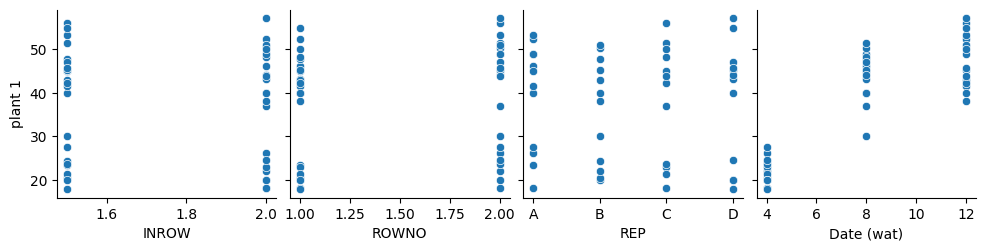

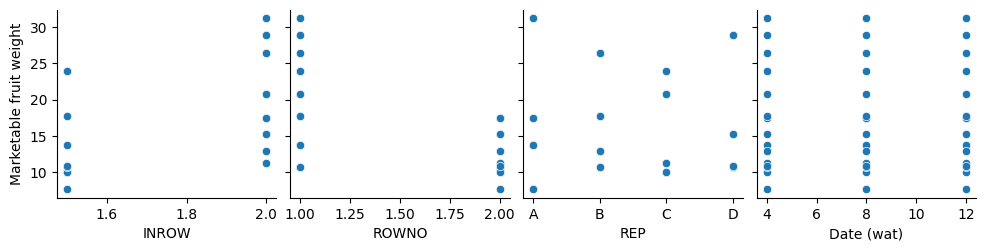

Score: 0.8218670717880161
R^2 Value: 0.8218670717880161


In [9]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import joblib
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/tomato data - Foliar analysis (1).csv')


print(df.describe())


import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(df, x_vars=['INROW', 'ROWNO', 'REP', 'Date (wat)'], y_vars='plant 1')
plt.show()


sns.pairplot(df, x_vars=['INROW', 'ROWNO', 'REP', 'Date (wat)'], y_vars='Marketable fruit weight')
plt.show()

X = df[['INROW', 'N', 'P','K', 'Date (wat)']]
y = df['plant 1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)
predictions = knn_regressor.predict(X_test)

print('Score:', knn_regressor.score(X_test, y_test))
print('R^2 Value:', r2_score(y_test, predictions))


# Save the model
joblib.dump(knn_regressor, 'knn_regression_model.pkl')

In [ ]:



data = pd.read_csv('/content/tomato data - Foliar analysis.csv')


data = data.fillna(data.mean())


X = data[['N', 'P', 'K', 'INROW','Date (wat)']]
y = data['Marketable fruit weight']


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()

param_grid = {'n_neighbors': range(1, 8)}


grid_search = GridSearchCV(knn, param_grid, cv=5)


grid_search.fit(X_train, y_train)


print(grid_search.best_params_)


knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)





y_pred = knn.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
joblib.dump(knn_regressor, 'knn_regression_model.pkl')

{'n_neighbors': 5}
Mean Squared Error: 34.929536608438966


<ipython-input-17-dce2539a7924>:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
